In [1]:
%matplotlib inline

#Importing Functions and Libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import pydataset as data
import itertools as it

#Importing pre-written scripts to streamline data acquisition and cleaning:
from acquire import get_zillow_data
from prepare import clean_telco_data, prep_telco_data
from env import get_db_url
from stats_toolkit import significance_test
from wrangle import wrangle_zillow, clearing_fips
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars

# Acquire, Prepare, and Split:

## Using my wrangle function to acquire and clean the data:
- Come back and add notes about what exactly this funciton does 

In [4]:
#Would it be better to separate my acquire functions from the preparation functions, or is it okay to keep them all together?b

df = wrangle_zillow()
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,propertylandusedesc,county
4,4,2.0,3633.0,296425.0,2005,6941.39,Single Family Residential,Los Angeles County
6,3,4.0,1620.0,847770.0,2011,10244.94,Single Family Residential,Los Angeles County
7,3,2.0,2077.0,646760.0,1926,7924.68,Single Family Residential,Los Angeles County
11,0,0.0,1200.0,5328.0,1972,91.60,Single Family Residential,Los Angeles County
14,0,0.0,171.0,6920.0,1973,255.17,Single Family Residential,Los Angeles County
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375.0,422400.0,2015,13877.56,Single Family Residential,Los Angeles County
2152858,4,3.0,2262.0,960756.0,2015,13494.52,Single Family Residential,Orange County
2152859,4,4.5,3127.0,536061.0,2014,6244.16,Single Family Residential,Orange County
2152861,3,2.5,1974.0,424353.0,2015,5302.70,Single Family Residential,Orange County


## Splitting Data:

In [7]:
train_and_validate, test = train_test_split(df, test_size = .2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size = .3, random_state = 123)

# Exploring Variables:

## Plotting Continuous Variable Pairs:

('bedroomcnt', 'bathroomcnt')


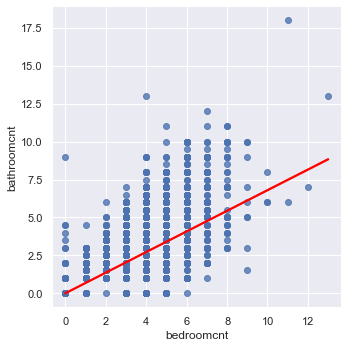

('bedroomcnt', 'calculatedfinishedsquarefeet')


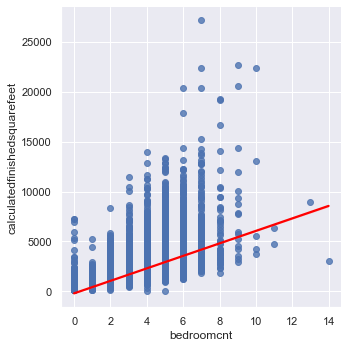

('bedroomcnt', 'taxvaluedollarcnt')


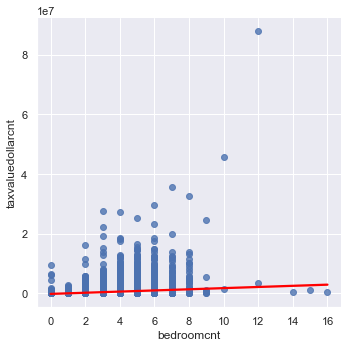

('bedroomcnt', 'yearbuilt')


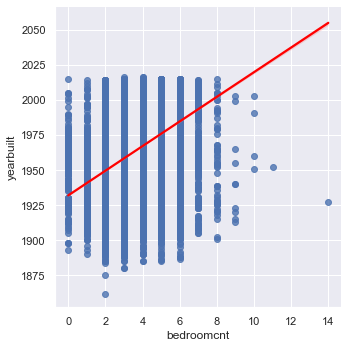

('bedroomcnt', 'taxamount')


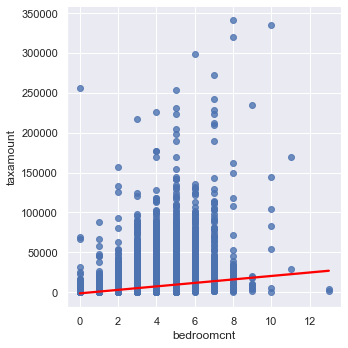

('bathroomcnt', 'calculatedfinishedsquarefeet')


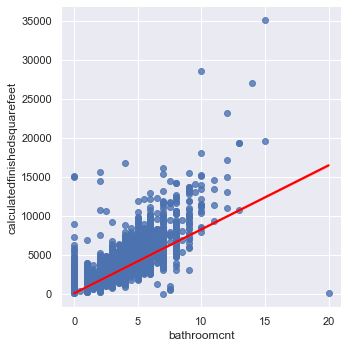

('bathroomcnt', 'taxvaluedollarcnt')


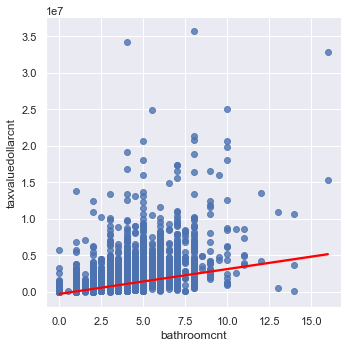

('bathroomcnt', 'yearbuilt')


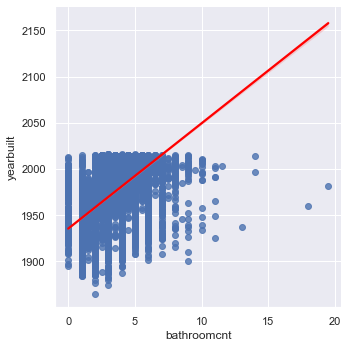

('bathroomcnt', 'taxamount')


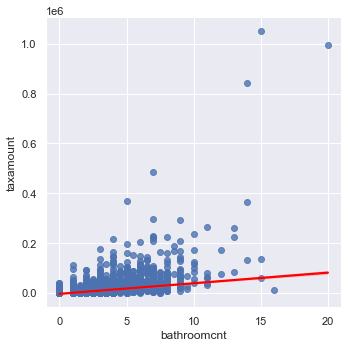

('calculatedfinishedsquarefeet', 'taxvaluedollarcnt')


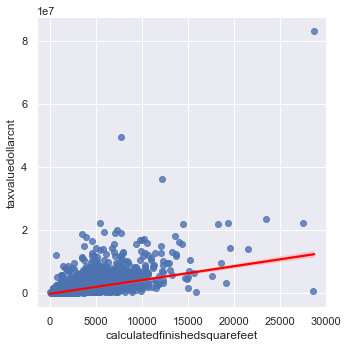

('calculatedfinishedsquarefeet', 'yearbuilt')


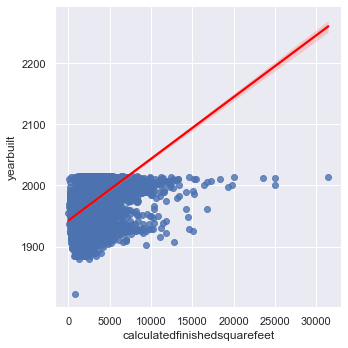

('calculatedfinishedsquarefeet', 'taxamount')


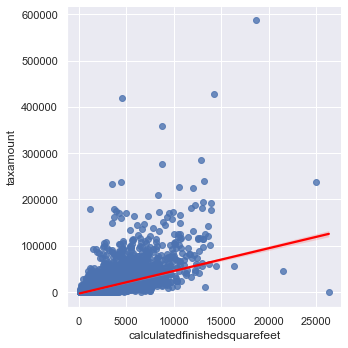

('taxvaluedollarcnt', 'yearbuilt')


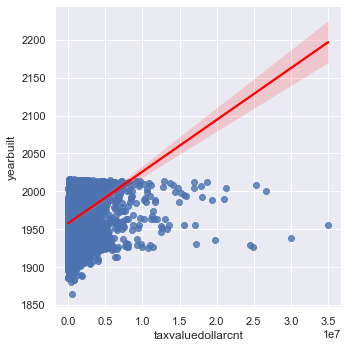

('taxvaluedollarcnt', 'taxamount')


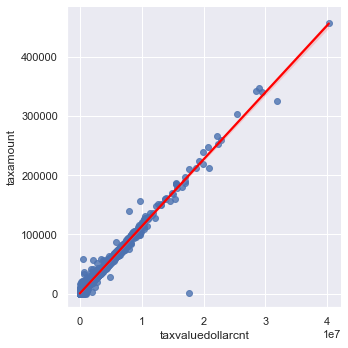

('yearbuilt', 'taxamount')


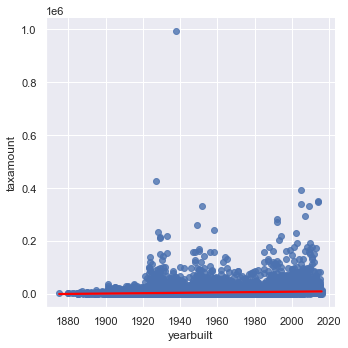

In [9]:
plot_variable_pairs(train)

## Plotting Continuous and Categorical Variable Pairs:

('county', 'bedroomcnt')


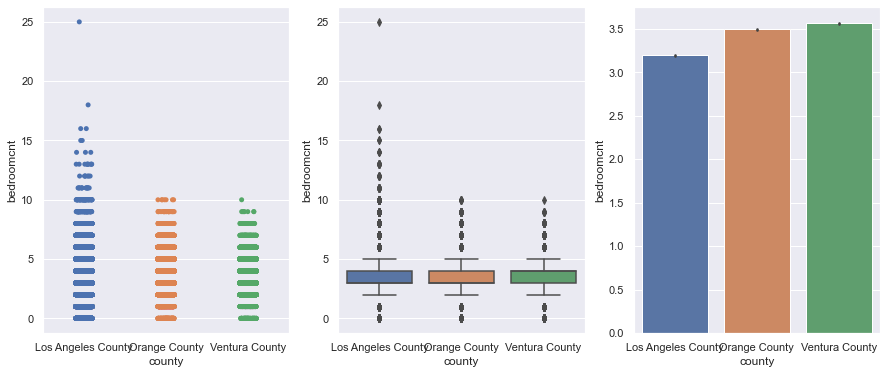

('county', 'bathroomcnt')


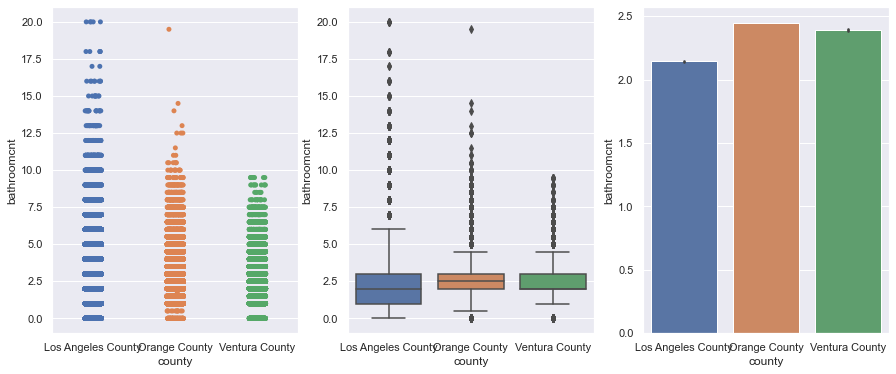

('county', 'calculatedfinishedsquarefeet')


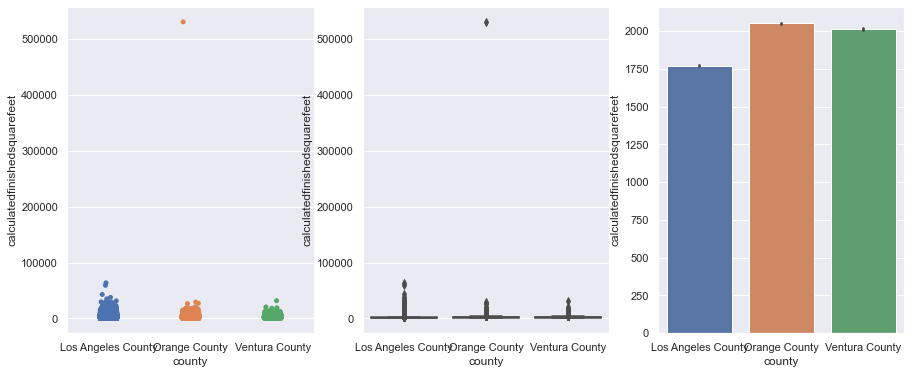

('county', 'taxvaluedollarcnt')


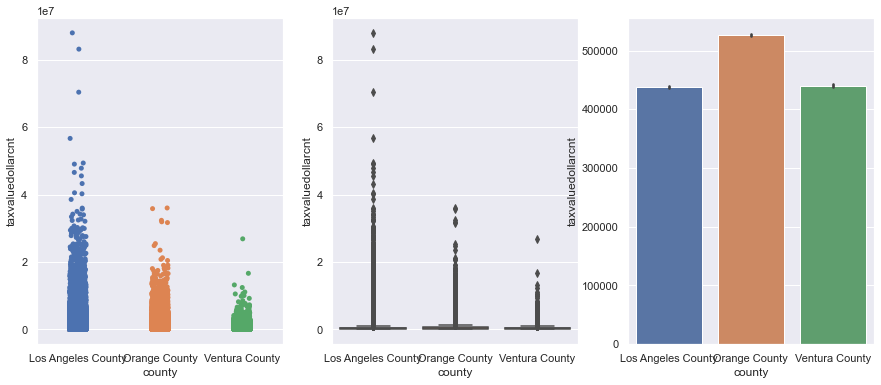

('county', 'yearbuilt')


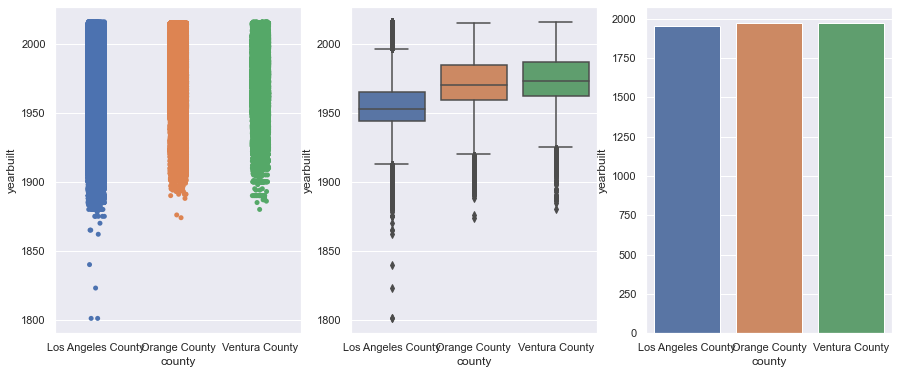

('county', 'taxamount')


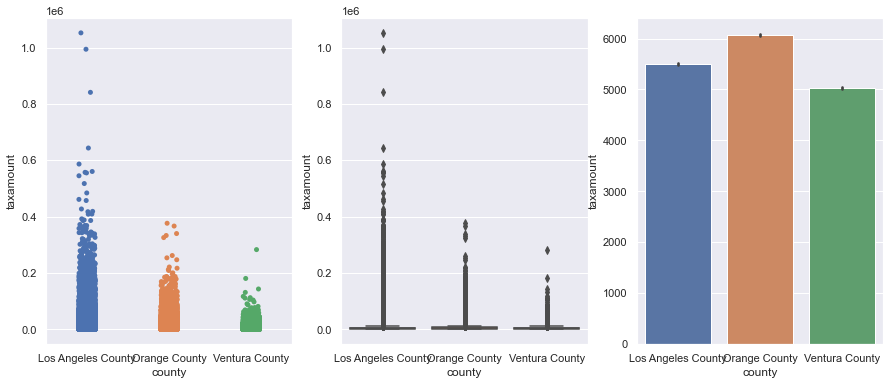

In [8]:
plot_categorical_and_continuous_vars(train)

# Initial Hypotheses:

1. Location will have a significant effect on housing value. 
2. There will be a relationship between location and average square footage/bedroom count/bathroom count.
3. There will be a relationship between value and square footage.

# Statistical Tests:

## Correlation With Home Value:

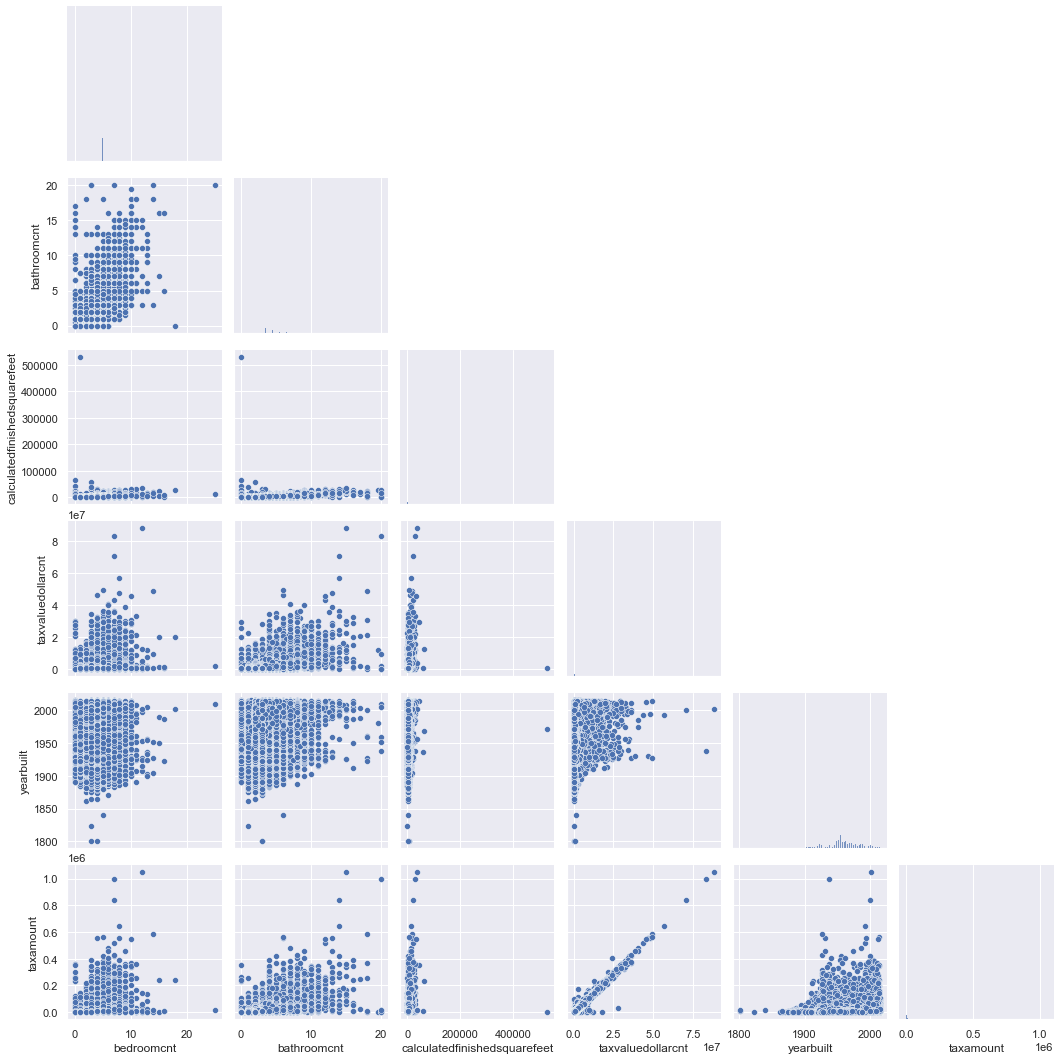

In [12]:
sns.pairplot(train, corner = True);

In [ ]:
def pearsonr_loop(df):
    
    cont_columns = df.select_dtypes(include = 'number').columns.tolist()
    pairs = combinations(cont_columns, 2)
    for pair in pairs:
        corr, p = stats.pearsonr(pair[0], pair[1])
        
        